# 1.1 - Intro Unsupervised Learning

**Ejemplos:** (Cuando no hay etiquetas)

+ Segmentación de clientes
+ Segmentación de productos
+ One-person segment (lo que funciona bien en un grupo no funciona necesariamente en otro)
+ Agrupación según características

**Escenario**

Cada elemento (usuario, cliente, producto..) puede ser considerado un vector. Dado un paquete de vectores se distribuyen por clusters. Vectores similares estarán en el mismo cluster, y clusters similares estarán más 'cerca' entre si que los que son más diferentes.

Todo éste proceder asume la existencia de una métrica de distancia, así se puede medir dicha distancia entre vectores dentro del espacio vectorial.

**Pasos para aplicar USL:**

+ **1**: Representación vectorial
+ **2**: Métrica, función de distancia
+ **3**: Medida de similitud

Cuando se crea un cluster, el vector en el centro del cluster (centroide) se considera el prototipo o el más representativo del cluster.


**Problemas tratables por USL:**

+ Segmentación de mercado
+ Detección de fraude en seguros o banca
+ Respuesta a tratamientos médicos
+ Detección de outliers

**Ejemplos de modelos:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

# K-Means


El más viejo y el más popular. La idea es seleccionar previamente cuantos clusters se desean ($k$). Se seleccionan los puntos centrales del cluster (centroides) de manera aleatoria. Para cada nuevo registro se reasigna un cluster y se recalcula el centroide (media). Se itera el proceso hasta que no haya cambio en la clusterización.

![kmeans](images/kmeans.png)

![kmeans2](images/kmeans2.png)

In [1]:
import pylab as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
census=pd.read_csv('../data/acs2015_county_data.csv')

census=census.dropna()

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
cols=[c for c in census.columns if c not in ['CensusId', 'State','County']]

In [4]:
# K-Means

from sklearn.cluster import KMeans

In [5]:
kmeans=KMeans(n_clusters=4) # 4 clusters

In [7]:
#help(kmeans)

In [8]:
clusters=kmeans.fit(census[cols])

In [11]:
len(clusters.cluster_centers_)

4

In [13]:
preds=clusters.fit_predict(census[cols])

preds[10:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

In [16]:
distancias=clusters.fit_transform(census[cols])

len(distancias)

3218

In [18]:
distancias[0]

array([1.08771054e+04, 3.69620918e+06, 1.43820788e+07, 9.96438206e+05])

In [17]:
census.shape

(3218, 37)

In [19]:
census['cluster']=preds

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0


In [21]:
census[census.cluster==0].head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0


In [22]:
census[census.cluster==2].head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
204,6037,California,Los Angeles,10038388,4945351,5093037,48.2,26.9,8.0,0.2,...,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0,2


In [23]:
census[census.cluster==3].head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
36,1073,Alabama,Jefferson,659026,311581,347445,3.8,51.0,42.2,0.2,...,1.0,2.5,23.6,293202,80.9,14.4,4.6,0.2,9.1,3
48,1097,Alabama,Mobile,414251,198216,216035,2.6,58.1,35.0,0.6,...,0.8,3.7,24.4,170900,81.4,13.8,4.6,0.1,9.8,3
106,4019,Arizona,Pima,998537,491108,507429,35.7,53.7,3.3,2.4,...,3.7,4.6,24.4,422371,74.9,18.3,6.6,0.2,10.0,3
170,5119,Arkansas,Pulaski,390463,187292,203171,5.9,54.2,35.4,0.3,...,1.1,2.9,20.3,180430,74.6,20.6,4.7,0.2,7.5,3
186,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3,3


In [26]:
census[census.cluster==3].State.value_counts()

California              15
Florida                 12
New Jersey              11
Texas                    9
Pennsylvania             9
New York                 8
Massachusetts            8
Ohio                     7
Colorado                 5
Maryland                 5
Washington               4
Illinois                 4
Georgia                  4
Michigan                 4
Missouri                 3
Minnesota                3
Louisiana                3
South Carolina           3
Virginia                 3
Wisconsin                3
Tennessee                3
Connecticut              3
Oregon                   3
North Carolina           3
Alabama                  2
Utah                     2
Kansas                   2
Oklahoma                 2
Indiana                  2
District of Columbia     1
Arizona                  1
Nebraska                 1
Idaho                    1
Hawaii                   1
Rhode Island             1
Arkansas                 1
Kentucky                 1
N

In [27]:
census[census.cluster==0].State.value_counts()

Texas             240
Georgia           155
Virginia          130
Kentucky          119
Missouri          112
Kansas            103
Iowa               98
Illinois           97
North Carolina     97
Nebraska           92
Tennessee          92
Indiana            90
Minnesota          84
Mississippi        82
Ohio               81
Michigan           78
Puerto Rico        78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          61
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
North Dakota       53
Florida            53
New York           51
Idaho              43
South Carolina     43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New Hampsh

In [28]:
census.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'cluster'],
      dtype='object')

In [29]:
census.groupby(['cluster'])['Income'].mean()

cluster
0    45258.590132
1    58589.894737
2    56196.000000
3    61204.303797
Name: Income, dtype: float64

In [30]:
census.groupby(['cluster'])['TotalPop'].mean()

cluster
0    4.861377e+04
1    2.594971e+06
2    1.003839e+07
3    7.149950e+05
Name: TotalPop, dtype: float64

In [31]:
census.groupby(['cluster'])['SelfEmployed'].mean()

cluster
0    8.070987
1    6.284211
2    9.400000
3    5.463924
Name: SelfEmployed, dtype: float64

In [32]:
census.groupby(['cluster'])['Employed'].mean()

cluster
0    2.150655e+04
1    1.205076e+06
2    4.635465e+06
3    3.411340e+05
Name: Employed, dtype: float64

In [33]:
census.groupby(['cluster'])['WorkAtHome'].mean()

cluster
0    4.635789
1    4.510526
2    5.100000
3    4.503797
Name: WorkAtHome, dtype: float64

In [34]:
census.groupby(['cluster'])['Service'].mean()

cluster
0    18.370263
1    19.510526
2    19.100000
3    17.683544
Name: Service, dtype: float64

##### plot 2D K-Means

In [35]:
np.set_printoptions(precision=5, suppress=True)

np.random.seed(4711)

a=np.random.multivariate_normal([10,0], [[3,1], [1,4]], size=[100,])
b=np.random.multivariate_normal([0,20], [[3,1], [1,4]], size=[50,])

In [36]:
X=np.concatenate((a,b),)
X.shape

(150, 2)

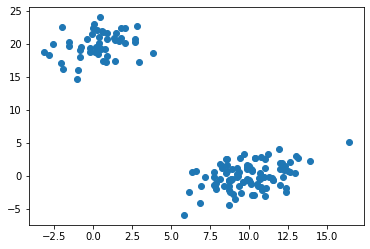

In [37]:
plt.scatter(X[:,0], X[:,1])
plt.show();

In [42]:
kmeans=KMeans(n_clusters=3)
clusters=kmeans.fit(X)

In [43]:
clusters.fit_predict(X)

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

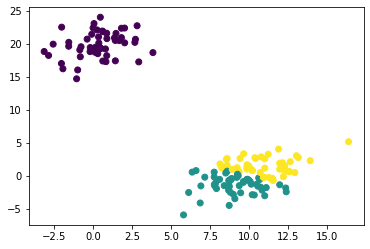

In [44]:
plt.scatter(X[:,0], X[:,1], c=clusters.fit_predict(X))
plt.show();

# Hierarchical Clustering (Dendrograma)

La mejora sobre K-Means es fundamentalmente que no hay que asumir el número de clusters.

Hay dos maneras de atacar éste problema:

+ Por aglomeración
+ Por división

**Aglomeración:**

Se empieza asumiendo que cada registro es un cluster individual y se van combinando aquellos similares hasta conseguir un solo cluster, la población entera. Después se decide el número óptimo de clusters según la distancia.


**División:**

El proceso inverso. Se comienza con un solo cluster y se va dividiendo hasta tener el número óptimo de clusters (según distancia).


![hca](images/hca.png)

##### Medidas de distancia

Aquí también entra la distancia, para medir entre registros/clusters. Normalmente, se usa la distancia euclídea. El uso de la métrica de distancia depende del problema en cuestión, por ejemplo, en una clusterización de lugares en la ciudad, podría ser mejor usar $cityblock$, o incluso tomar el tiempo que hay entre dos lugares (tiempo como métrica de distancia).

##### Criterios de conexión (linkage criteria)

Después de seleccionar la métrica de distancia, hay que decidir de qué manera se conectan los registros al cluster. Puede ser:

+ Single-linkage: conexión entre los puntos más parecidos del cluster.
+ Complete-linkage: conexión entre los puntos menos parecidos del cluster.
+ Average-linkage: conexión entre los centroides del cluster.


![link](images/link.png)

Al igual que la métrica de distancia, la elección del criterio de conexión ha de basarse en el propio problema. Por ejemplo, para clasificar varias tecnologías diferentes tendría sentido basarse en cuales son más parecidos. Si no existen justificaciones claras de cual usar, se suele usar el criterio de Ward, que viene a ser mínimos cuadrados de las distancias, respecto de la media del cluster. Esto concuerda con el concepto de distancia entre grupos en estadística (ANOVA, MANOVA....)

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [50]:
#help(linkage)

In [52]:
X.shape

(150, 2)

In [53]:
Z=linkage(X, 'ward')

Z.shape

(149, 4)

In [54]:
Z[0]   # idx1, idx2, distancia, sample_count

array([52.     , 53.     ,  0.04151,  2.     ])

In [55]:
Z[3]

array([17.     , 73.     ,  0.07137,  2.     ])

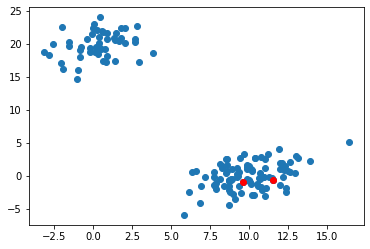

In [56]:
idxs=[17, 63]

plt.scatter(X[:, 0], X[:,1])
plt.scatter(X[idxs, 0], X[idxs,1], c='r')
plt.show();

##### dendrograma

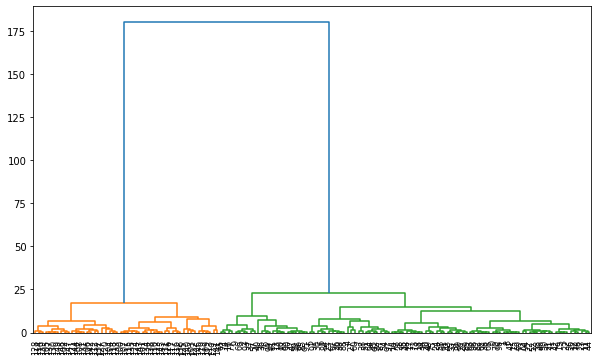

In [58]:
plt.figure(figsize=(10, 6))

dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show();

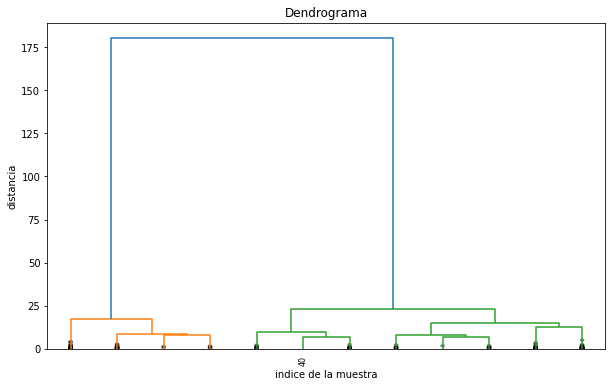

In [59]:
plt.figure(figsize=(10, 6))

dendrogram(Z, 
           leaf_rotation=90., 
           leaf_font_size=8.,
           truncate_mode='lastp', 
           p=12, 
           show_contracted=True, 
           show_leaf_counts=False)

plt.title('Dendrograma')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
plt.show();

In [60]:
def fancy_dendro(*args, **kwargs):
    max_d=kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotate_above=kwargs.pop('annotate_above', None)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma')
        plt.xlabel('Indice de muestra o (tamaño del cluster)')
        plt.ylabel('Distancia')
        
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.5*sum(i[1:3])
            y=d[1]
            
            if y>annotate_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords='offset points', va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k')
    
    return ddata
    
    

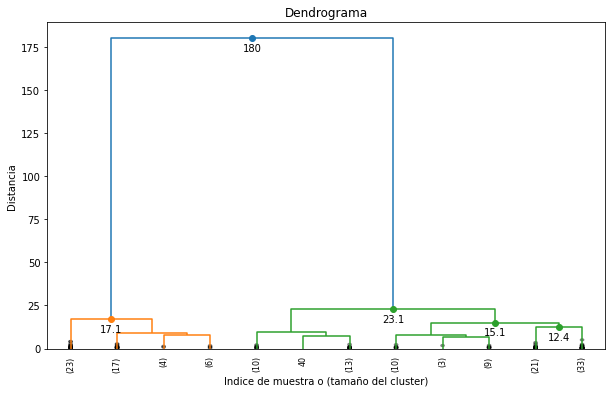

In [65]:
plt.figure(figsize=(10, 6))


fancy_dendro(Z, 
           leaf_rotation=90., 
           leaf_font_size=8.,
           truncate_mode='lastp', 
           p=12, 
           show_contracted=True,
           annotate_above=10)

plt.show();

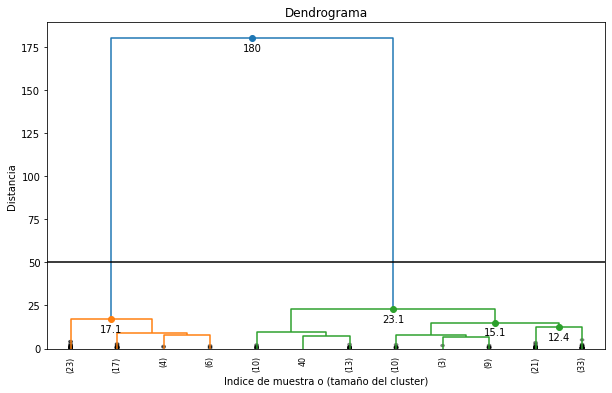

In [66]:
plt.figure(figsize=(10, 6))


fancy_dendro(Z, 
           leaf_rotation=90., 
           leaf_font_size=8.,
           truncate_mode='lastp', 
           p=12, 
           show_contracted=True,
           annotate_above=10, 
           max_d=50)

plt.show();

##### obteniendo clusters

In [67]:
from scipy.cluster.hierarchy import fcluster

In [68]:
max_d=50

clusters=fcluster(Z, max_d, criterion='distance')

clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

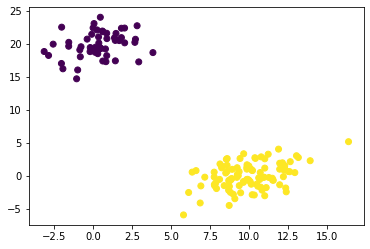

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=clusters);

In [71]:
# conocida k...

k=2

clusters=fcluster(Z, k, criterion='maxclust')

clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

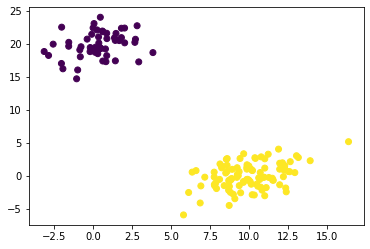

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=clusters);

# K-Means VS Hierarchical

In [73]:
from sklearn.datasets import make_moons

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC

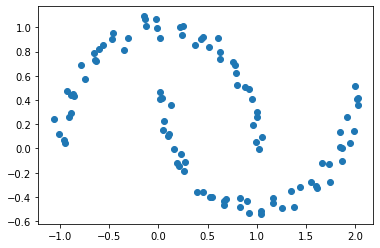

In [74]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)[0]

plt.scatter(moons[:, 0], moons[:, 1]);

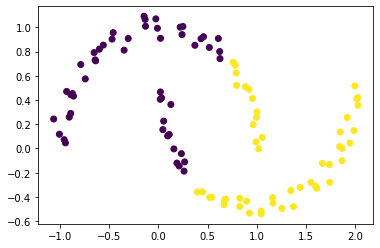

In [75]:
cluster=KMeans(n_clusters=2).fit(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

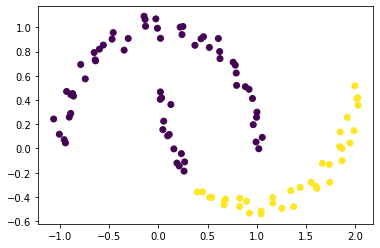

In [76]:
cluster=AC().fit(moons)  # ward por defecto

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

In [84]:
#help(AC())

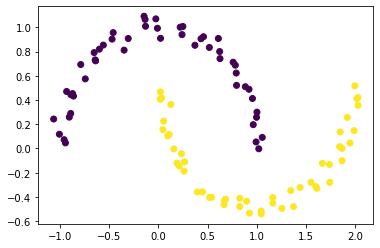

In [80]:
cluster=AC(linkage='single').fit(moons)  

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

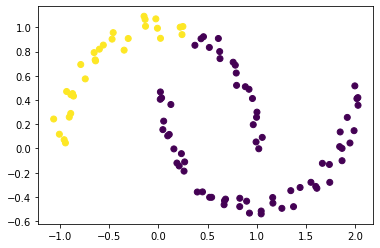

In [87]:
cluster=AC(linkage='complete').fit(moons)  

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

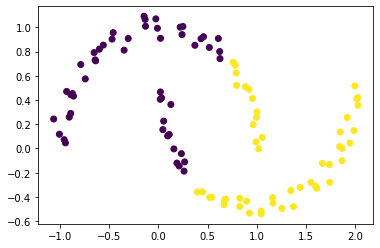

In [82]:
cluster=AC(linkage='average').fit(moons)  

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

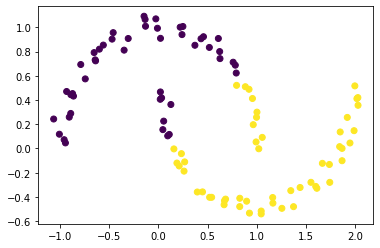

In [91]:
cluster=AC(linkage='complete', affinity='cosine').fit(moons)  

plt.scatter(moons[:, 0], moons[:, 1], c=cluster.labels_);

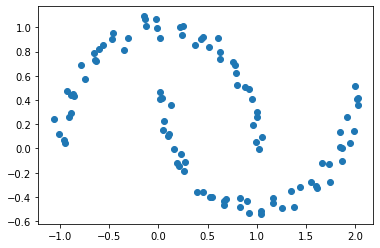

In [92]:
plt.scatter(moons[:, 0], moons[:, 1]);